# Instagram Reach & Viral Score Prediction

This project uses machine learning to predict two things:
1. **Impressions** - How many people will see a post
2. **Viral Score** - How likely a post is to go viral (0-100 scale)

I'll compare 5 different regression models to find which works best for each task.

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

print("Libraries loaded successfully")

Libraries loaded successfully


## 2. Load and Explore Data

In [2]:
# Load data
df = pd.read_csv('/Users/riya/Instagram_reach/Instagram_Data.csv',encoding='latin1')
print(f"Dataset shape: {df.shape}")
display(df)

Dataset shape: (119, 13)


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [3]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [4]:
# Summary statistics
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [5]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


## 3. Data Cleaning

In [6]:
# Drop unnecessary columns
df_clean = df.drop(columns=['S.No'], errors='ignore')

# Handle text columns
if 'Caption' in df_clean.columns:
    df_clean['caption_len'] = df_clean['Caption'].fillna('').str.len()
if 'Hashtags' in df_clean.columns:
    df_clean['hashtag_count'] = df_clean['Hashtags'].fillna('').str.count('#')

# Drop text columns after extracting features
df_clean = df_clean.drop(columns=['Caption', 'Hashtags'], errors='ignore')

# Remove any rows with missing values
df_clean = df_clean.dropna()

print(f"Clean dataset shape: {df_clean.shape}")
df_clean.head()

Clean dataset shape: (119, 13)


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,caption_len,hashtag_count
0,3920,2586,1028,619,56,98,9,5,162,35,2,112,22
1,5394,2727,1838,1174,78,194,7,14,224,48,10,187,18
2,4021,2085,1188,0,533,41,11,1,131,62,12,117,18
3,4528,2700,621,932,73,172,10,7,213,23,8,202,11
4,2518,1704,255,279,37,96,5,4,123,8,0,178,29


## 4. Feature Engineering

In [7]:
# Create useful features
df_clean['saves_per_like'] = df_clean['Saves'] / (df_clean['Likes'] + 1)
df_clean['shares_per_like'] = df_clean['Shares'] / (df_clean['Likes'] + 1)
df_clean['follow_rate'] = df_clean['Follows'] / (df_clean['Profile Visits'] + 1)
df_clean['total_engagement'] = df_clean['Likes'] + df_clean['Comments'] + df_clean['Saves'] + df_clean['Shares']
df_clean['engagement_rate'] = df_clean['total_engagement'] / (df_clean['Impressions'] + 1)

print("New features created")
df_clean.head()

New features created


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,caption_len,hashtag_count,saves_per_like,shares_per_like,follow_rate,total_engagement,engagement_rate
0,3920,2586,1028,619,56,98,9,5,162,35,2,112,22,0.601227,0.030675,0.055556,274,0.069880
1,5394,2727,1838,1174,78,194,7,14,224,48,10,187,18,0.862222,0.062222,0.204082,439,0.081372
2,4021,2085,1188,0,533,41,11,1,131,62,12,117,18,0.310606,0.007576,0.190476,184,0.045748
3,4528,2700,621,932,73,172,10,7,213,23,8,202,11,0.803738,0.032710,0.333333,402,0.088761
4,2518,1704,255,279,37,96,5,4,123,8,0,178,29,0.774194,0.032258,0.000000,228,0.090512


## 5. Analyzing Instagram Reach


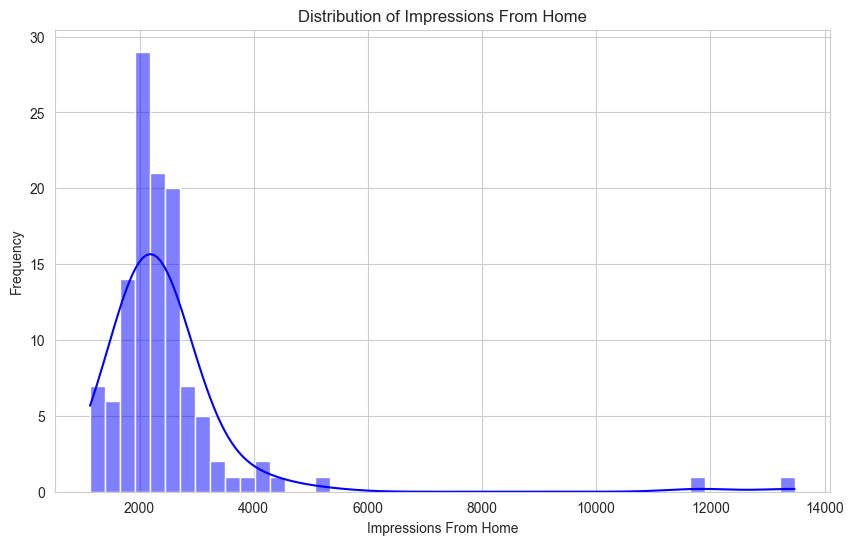

In [8]:
# Distribution of impressions from home
plt.figure(figsize=(10, 6))
plt.title("Distribution of Impressions From Home")
sns.histplot(df['From Home'], kde=True, color='blue')
plt.xlabel("Impressions From Home")
plt.ylabel("Frequency")
plt.show()

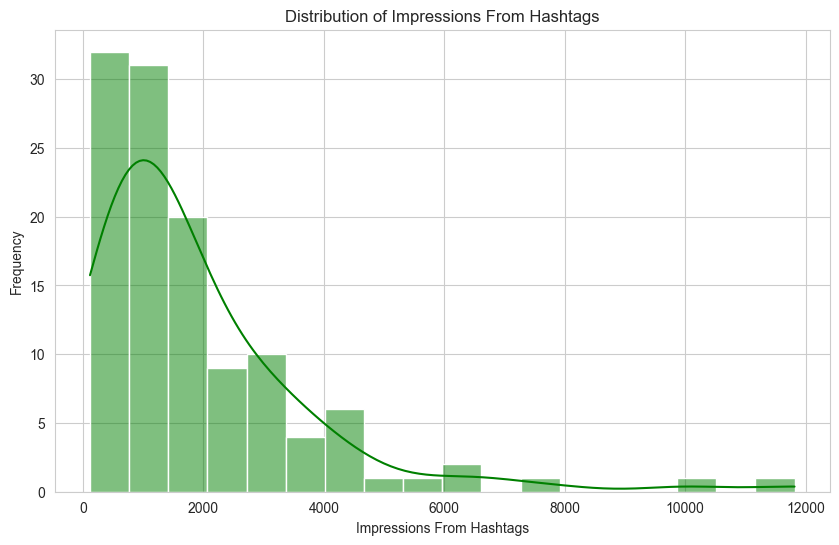

In [9]:
# Distribution of impressions from hashtags
plt.figure(figsize=(10, 6))
plt.title("Distribution of Impressions From Hashtags")
sns.histplot(df['From Hashtags'], kde=True, color='green')
plt.xlabel("Impressions From Hashtags")
plt.ylabel("Frequency")
plt.show()

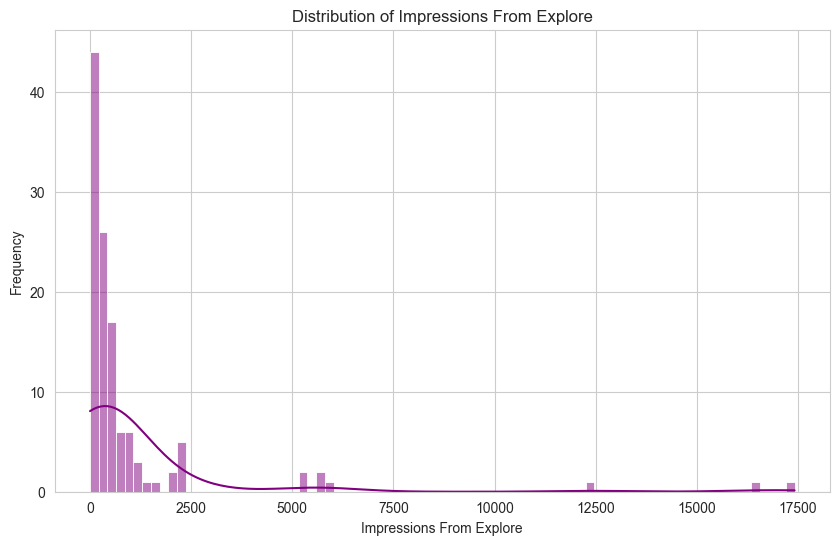

In [10]:
# Distribution of impressions from explore
plt.figure(figsize=(10, 6))
plt.title("Distribution of Impressions From Explore")
sns.histplot(df['From Explore'], kde=True, color='purple')
plt.xlabel("Impressions From Explore")
plt.ylabel("Frequency")
plt.show()


### Impressions from Various Sources

##### We'll create a pie chart to visualize the proportion of impressions from different sources.



In [11]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]

fig = px.pie(values=values, names=labels, title='Impressions from Various Sources', hole=0.5, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

## 5. Create Viral Score Target

I'll create a viral score (0-100) based on normalized engagement metrics:

In [12]:
# Normalize key metrics to 0-1 scale
scaler_viral = MinMaxScaler()

metrics_for_viral = ['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']
df_normalized = pd.DataFrame(
    scaler_viral.fit_transform(df_clean[metrics_for_viral]),
    columns=metrics_for_viral,
    index=df_clean.index
)

# Create viral score as weighted combination
# Higher weights for saves and follows (quality signals)
df_clean['Viral_Score'] = (
    df_normalized['Likes'] * 0.20 +
    df_normalized['Saves'] * 0.25 +
    df_normalized['Comments'] * 0.15 +
    df_normalized['Shares'] * 0.15 +
    df_normalized['Profile Visits'] * 0.10 +
    df_normalized['Follows'] * 0.15
) * 100

print(f"Viral Score range: {df_clean['Viral_Score'].min():.1f} to {df_clean['Viral_Score'].max():.1f}")
print(f"Mean Viral Score: {df_clean['Viral_Score'].mean():.1f}")

Viral Score range: 2.3 to 76.3
Mean Viral Score: 16.4


## 6. Exploratory Data Analysis

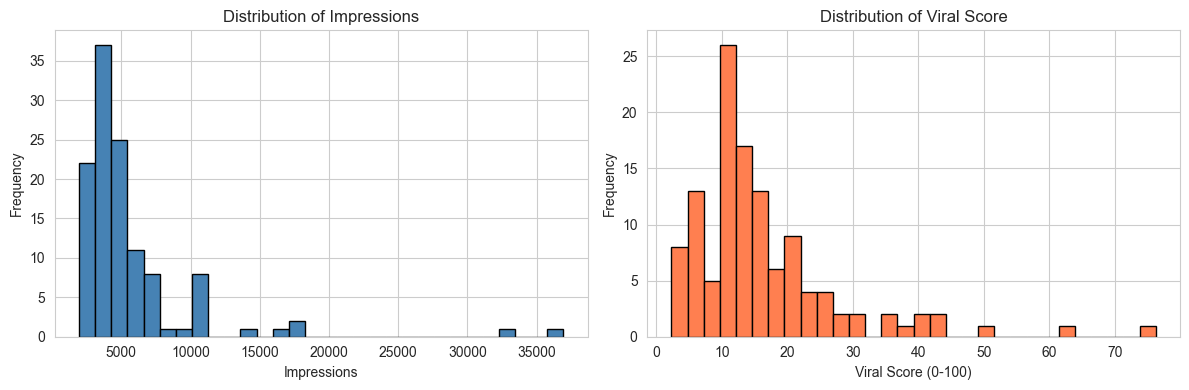

In [13]:
# Distribution of both target variables
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df_clean['Impressions'], bins=30, edgecolor='black', color='steelblue')
axes[0].set_title('Distribution of Impressions')
axes[0].set_xlabel('Impressions')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_clean['Viral_Score'], bins=30, edgecolor='black', color='coral')
axes[1].set_title('Distribution of Viral Score')
axes[1].set_xlabel('Viral Score (0-100)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

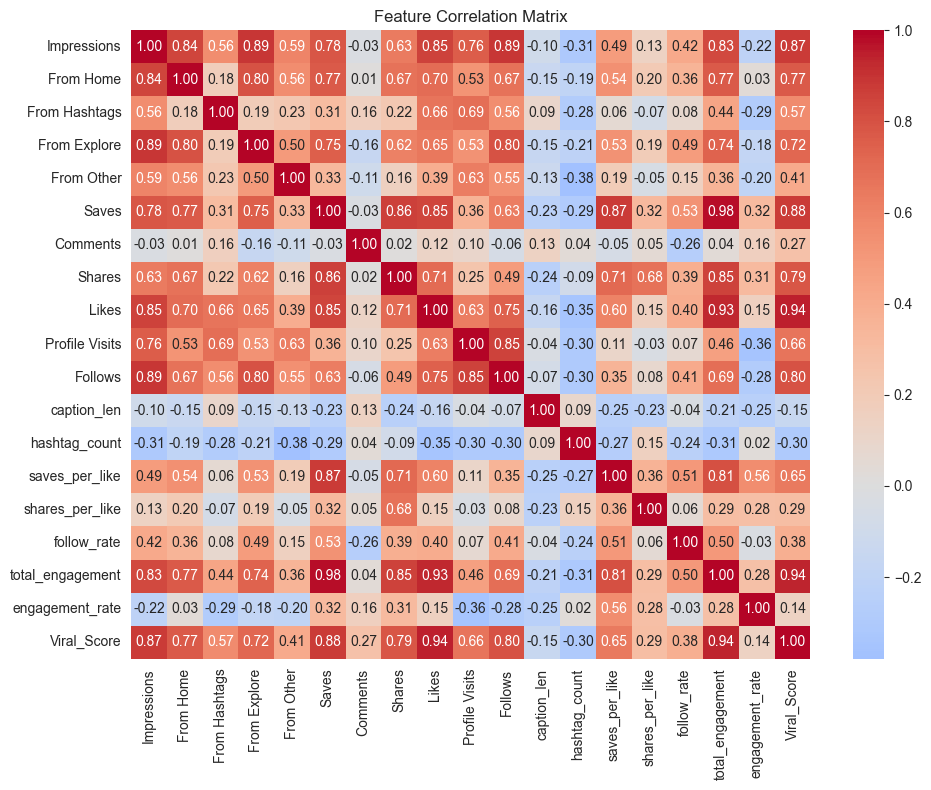

In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df_clean.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

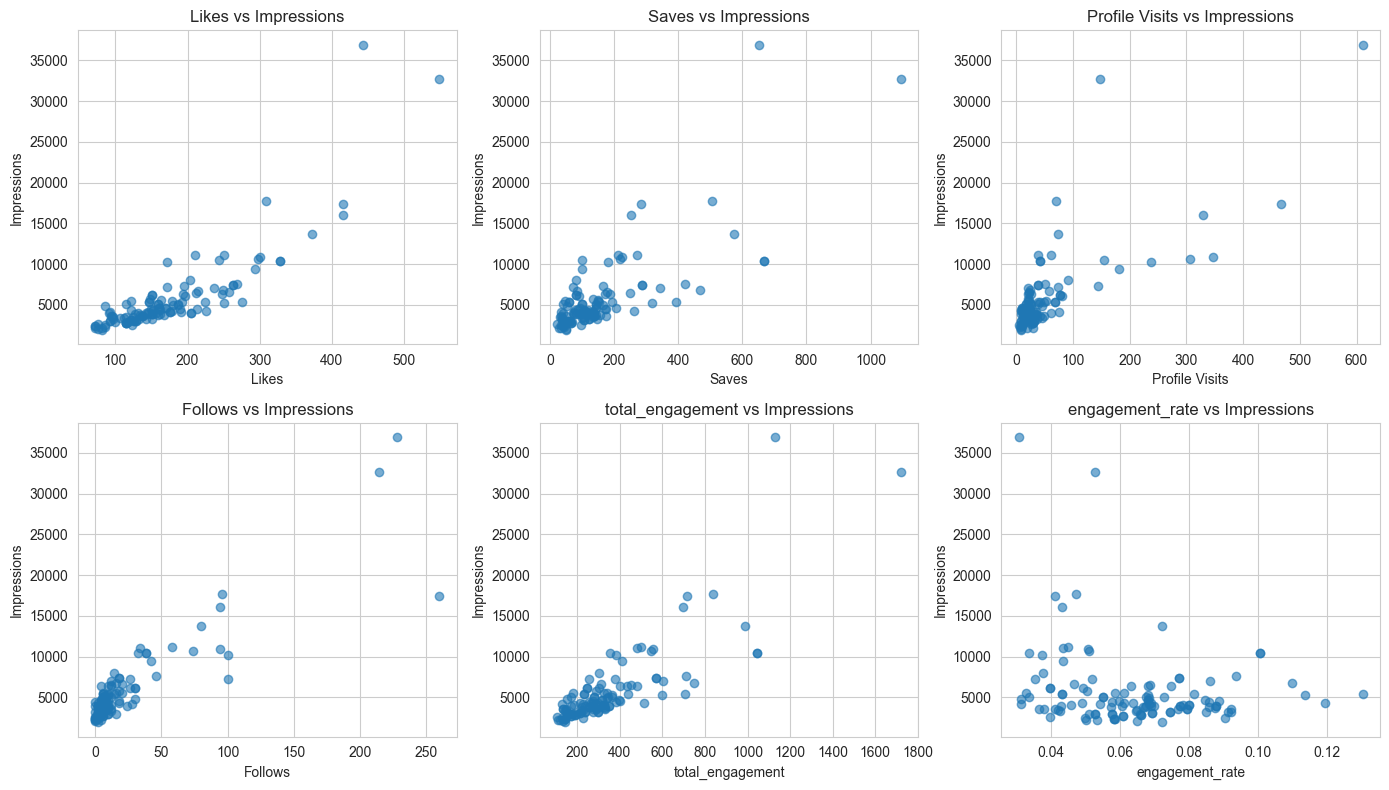

In [15]:
# Key relationships
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

metrics = ['Likes', 'Saves', 'Profile Visits', 'Follows', 'total_engagement', 'engagement_rate']
for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3
    axes[row, col].scatter(df_clean[metric], df_clean['Impressions'], alpha=0.6)
    axes[row, col].set_xlabel(metric)
    axes[row, col].set_ylabel('Impressions')
    axes[row, col].set_title(f'{metric} vs Impressions')

plt.tight_layout()
plt.show()

## Analyzing Conversion Rate
Conversion rate helps us understand how effective profile visits are in gaining followers.

In [27]:
conversion_rate = (df["Follows"].sum() / df["Profile Visits"].sum()) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 41.00%


## 7. Prepare Data for Modeling

In [28]:
# Select features
features = ['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows',
            'saves_per_like', 'shares_per_like', 'follow_rate', 
            'total_engagement', 'engagement_rate']

# Add text features if available
if 'hashtag_count' in df_clean.columns:
    features.append('hashtag_count')
if 'caption_len' in df_clean.columns:
    features.append('caption_len')

X = df_clean[features]
y_impressions = df_clean['Impressions']
y_viral = df_clean['Viral_Score']

print(f"Features used: {len(features)}")
print(f"Total samples: {len(X)}")

Features used: 13
Total samples: 119


In [29]:
# Split data (same split for both tasks)
X_train, X_test, y_imp_train, y_imp_test = train_test_split(
    X, y_impressions, test_size=0.2, random_state=42
)

_, _, y_viral_train, y_viral_test = train_test_split(
    X, y_viral, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 95 samples
Test set: 24 samples


In [30]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled")

Features scaled


## 8. Task 1: Predicting Impressions (Reach)

In [32]:
# Initialize models
models_impressions = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results_impressions = []

print("Training models for Impressions prediction...\n")

for name, model in models_impressions.items():
    # Train
    model.fit(X_train_scaled, y_imp_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    r2 = r2_score(y_imp_test, y_pred)
    mae = mean_absolute_error(y_imp_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_imp_test, y_pred))
    cv_scores = cross_val_score(model, X_train_scaled, y_imp_train, cv=5, scoring='r2')
    
    results_impressions.append({
        'Model': name,
        'R²': r2,
        'MAE': mae,
        'RMSE': rmse,
        'CV R²': cv_scores.mean()
    })
    
    print(f"{name}:")
    print(f"  R²: {r2:.4f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  CV R²: {cv_scores.mean():.4f}\n")

results_imp_df = pd.DataFrame(results_impressions).sort_values('R²', ascending=False)
print("\nImpressions Prediction - Model Rankings:")
print(results_imp_df.to_string(index=False))

Training models for Impressions prediction...

Linear Regression:
  R²: 0.9360
  MAE: 1026.58
  RMSE: 1577.19
  CV R²: 0.8053

Ridge:
  R²: 0.9485
  MAE: 936.78
  RMSE: 1414.19
  CV R²: 0.8210

Lasso:
  R²: 0.9374
  MAE: 1015.60
  RMSE: 1559.64
  CV R²: 0.8057

Random Forest:
  R²: 0.8670
  MAE: 1062.64
  RMSE: 2272.85
  CV R²: 0.6646

Gradient Boosting:
  R²: 0.9061
  MAE: 743.21
  RMSE: 1909.36
  CV R²: 0.6435


Impressions Prediction - Model Rankings:
            Model       R²         MAE        RMSE    CV R²
            Ridge 0.948505  936.783146 1414.194366 0.821007
            Lasso 0.937368 1015.599286 1559.644335 0.805742
Linear Regression 0.935951 1026.582526 1577.187104 0.805322
Gradient Boosting 0.906131  743.206493 1909.357695 0.643484
    Random Forest 0.866990 1062.643750 2272.845115 0.664586


## 9. Task 2: Predicting Viral Score

In [33]:
# Initialize models for viral score
models_viral = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results_viral = []

print("Training models for Viral Score prediction...\n")

for name, model in models_viral.items():
    # Train
    model.fit(X_train_scaled, y_viral_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    r2 = r2_score(y_viral_test, y_pred)
    mae = mean_absolute_error(y_viral_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_viral_test, y_pred))
    cv_scores = cross_val_score(model, X_train_scaled, y_viral_train, cv=5, scoring='r2')
    
    results_viral.append({
        'Model': name,
        'R²': r2,
        'MAE': mae,
        'RMSE': rmse,
        'CV R²': cv_scores.mean()
    })
    
    print(f"{name}:")
    print(f"  R²: {r2:.4f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  CV R²: {cv_scores.mean():.4f}\n")

results_viral_df = pd.DataFrame(results_viral).sort_values('R²', ascending=False)
print("\nViral Score Prediction - Model Rankings:")
print(results_viral_df.to_string(index=False))

Training models for Viral Score prediction...

Linear Regression:
  R²: 1.0000
  MAE: 0.00
  RMSE: 0.00
  CV R²: 1.0000

Ridge:
  R²: 0.9999
  MAE: 0.06
  RMSE: 0.12
  CV R²: 0.9998

Lasso:
  R²: 0.9805
  MAE: 1.26
  RMSE: 2.08
  CV R²: 0.9478

Random Forest:
  R²: 0.7685
  MAE: 3.48
  RMSE: 7.16
  CV R²: 0.8707

Gradient Boosting:
  R²: 0.8297
  MAE: 2.90
  RMSE: 6.15
  CV R²: 0.8819


Viral Score Prediction - Model Rankings:
            Model       R²          MAE         RMSE    CV R²
Linear Regression 1.000000 1.282308e-14 1.746335e-14 1.000000
            Ridge 0.999931 5.577524e-02 1.234615e-01 0.999846
            Lasso 0.980547 1.264408e+00 2.077114e+00 0.947843
Gradient Boosting 0.829666 2.896790e+00 6.146295e+00 0.881935
    Random Forest 0.768538 3.476067e+00 7.164766e+00 0.870656


## 10. Compare Both Tasks

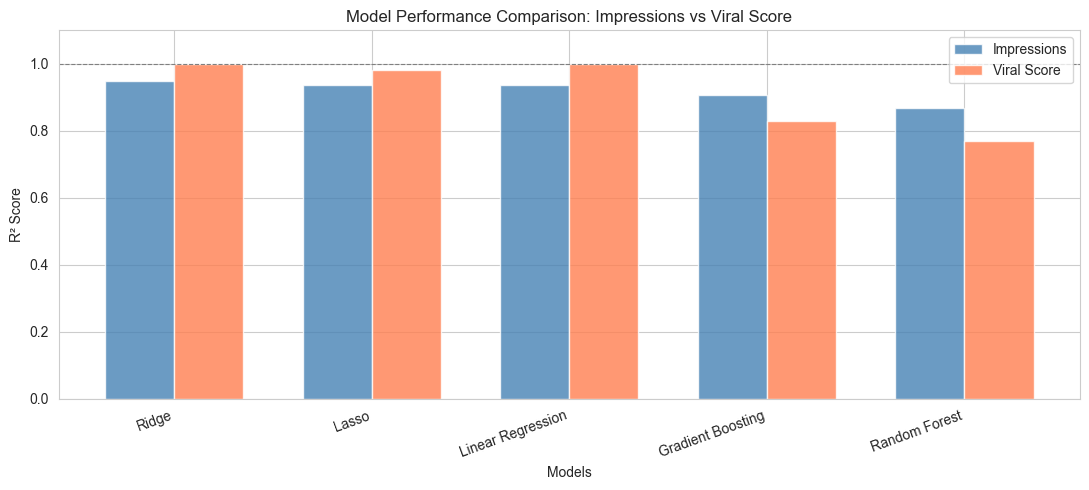

In [34]:
# Side-by-side R² comparison
model_names = results_imp_df['Model'].values
r2_impressions = results_imp_df['R²'].values
r2_viral = results_viral_df.set_index('Model').reindex(model_names)['R²'].values

fig, ax = plt.subplots(figsize=(11, 5))
x = np.arange(len(model_names))
width = 0.35

ax.bar(x - width/2, r2_impressions, width, label='Impressions', color='steelblue', alpha=0.8)
ax.bar(x + width/2, r2_viral, width, label='Viral Score', color='coral', alpha=0.8)

ax.set_xlabel('Models')
ax.set_ylabel('R² Score')
ax.set_title('Model Performance Comparison: Impressions vs Viral Score')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=20, ha='right')
ax.legend()
ax.set_ylim(0, 1.1)
ax.axhline(y=1.0, color='gray', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()

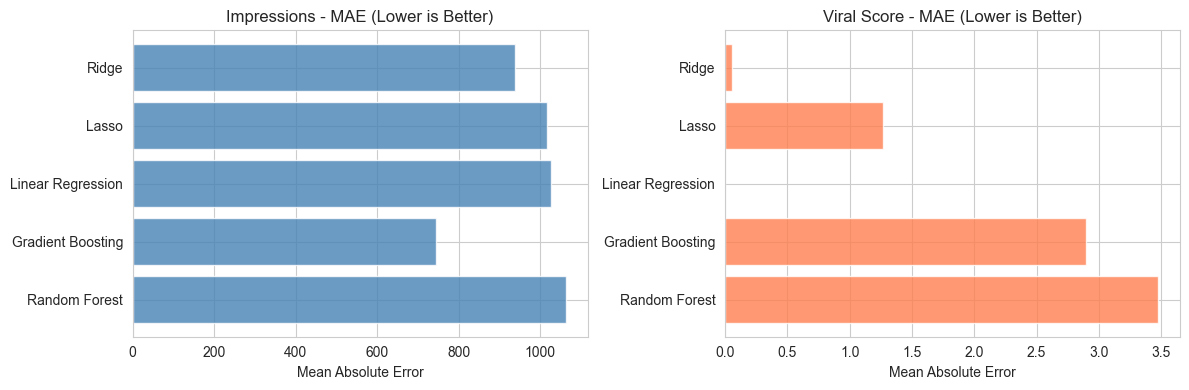

In [35]:
# MAE comparison
mae_impressions = results_imp_df['MAE'].values
mae_viral = results_viral_df.set_index('Model').reindex(model_names)['MAE'].values

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].barh(model_names, mae_impressions, color='steelblue', alpha=0.8)
axes[0].set_xlabel('Mean Absolute Error')
axes[0].set_title('Impressions - MAE (Lower is Better)')
axes[0].invert_yaxis()

axes[1].barh(model_names, mae_viral, color='coral', alpha=0.8)
axes[1].set_xlabel('Mean Absolute Error')
axes[1].set_title('Viral Score - MAE (Lower is Better)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## 11. Feature Importance

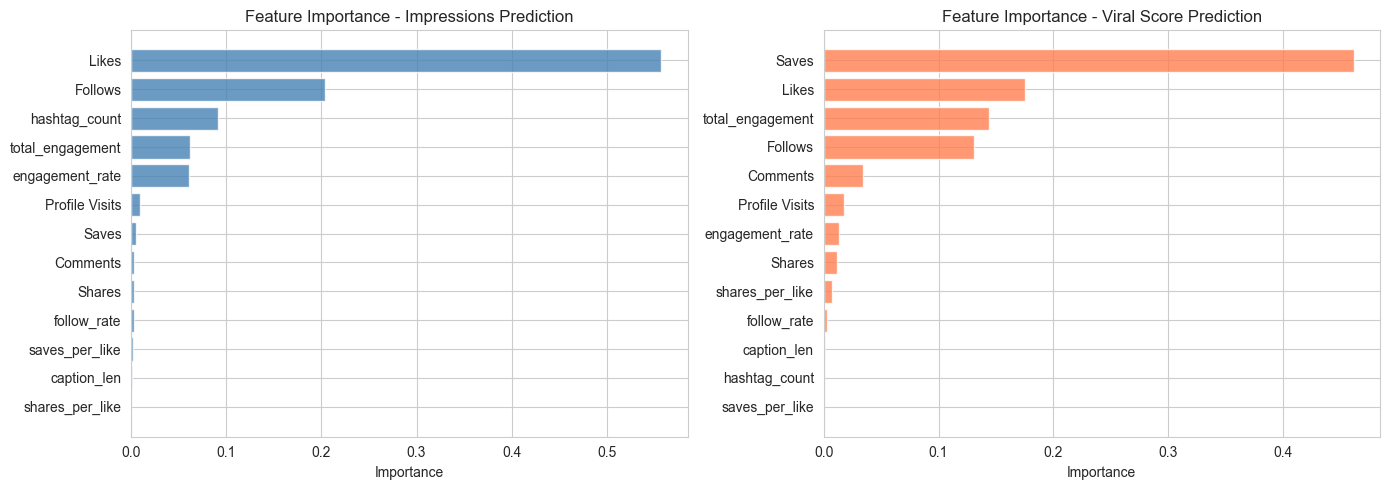


Top 5 Features for Impressions:
         Feature  Importance
           Likes    0.557052
         Follows    0.203342
   hashtag_count    0.090768
total_engagement    0.062148
 engagement_rate    0.061271

Top 5 Features for Viral Score:
         Feature  Importance
           Saves    0.461462
           Likes    0.174887
total_engagement    0.143574
         Follows    0.130512
        Comments    0.034618


In [23]:
# Train best models for feature importance
best_model_imp = GradientBoostingRegressor(n_estimators=100, random_state=42)
best_model_imp.fit(X_train_scaled, y_imp_train)

best_model_viral = GradientBoostingRegressor(n_estimators=100, random_state=42)
best_model_viral.fit(X_train_scaled, y_viral_train)

# Get feature importances
imp_importance = pd.DataFrame({
    'Feature': features,
    'Importance': best_model_imp.feature_importances_
}).sort_values('Importance', ascending=False)

viral_importance = pd.DataFrame({
    'Feature': features,
    'Importance': best_model_viral.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].barh(imp_importance['Feature'], imp_importance['Importance'], color='steelblue', alpha=0.8)
axes[0].set_xlabel('Importance')
axes[0].set_title('Feature Importance - Impressions Prediction')
axes[0].invert_yaxis()

axes[1].barh(viral_importance['Feature'], viral_importance['Importance'], color='coral', alpha=0.8)
axes[1].set_xlabel('Importance')
axes[1].set_title('Feature Importance - Viral Score Prediction')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\nTop 5 Features for Impressions:")
print(imp_importance.head().to_string(index=False))

print("\nTop 5 Features for Viral Score:")
print(viral_importance.head().to_string(index=False))

## 12. Prediction Function for New Posts

In [24]:
def predict_post_performance(likes, saves, comments, shares, profile_visits, follows,
                             hashtag_count=20, caption_len=120):
    """
    Predict both impressions and viral score for a new post
    """
    # Calculate derived features
    total_eng = likes + comments + saves + shares
    imp_proxy = max(likes * 18, 2000)
    
    # Create feature dataframe
    new_post = pd.DataFrame([{
        'Likes': likes,
        'Saves': saves,
        'Comments': comments,
        'Shares': shares,
        'Profile Visits': profile_visits,
        'Follows': follows,
        'saves_per_like': saves / (likes + 1),
        'shares_per_like': shares / (likes + 1),
        'follow_rate': follows / (profile_visits + 1),
        'total_engagement': total_eng,
        'engagement_rate': total_eng / (imp_proxy + 1),
        'hashtag_count': hashtag_count,
        'caption_len': caption_len
    }])
    
    # Use only features that exist in training data
    available_features = [f for f in features if f in new_post.columns]
    
    # Scale and predict
    new_post_scaled = scaler.transform(new_post[available_features])
    pred_impressions = best_model_imp.predict(new_post_scaled)[0]
    pred_viral = best_model_viral.predict(new_post_scaled)[0]
    pred_viral = max(0, min(100, pred_viral))  # Clip to 0-100
    
    # Categorize viral potential
    if pred_viral >= 60:
        category = "High Viral Potential"
    elif pred_viral >= 30:
        category = "Moderate Reach"
    else:
        category = "Organic Reach"
    
    print("="*50)
    print("POST PERFORMANCE PREDICTION")
    print("="*50)
    print(f"Input Metrics:")
    print(f"  Likes: {likes}, Saves: {saves}, Comments: {comments}")
    print(f"  Shares: {shares}, Profile Visits: {profile_visits}, Follows: {follows}")
    print("-"*50)
    print(f"Predicted Impressions: {pred_impressions:,.0f}")
    print(f"Predicted Viral Score: {pred_viral:.1f}/100")
    print(f"Category: {category}")
    print("="*50)
    
    return pred_impressions, pred_viral

# Example predictions
print("Example 1: Average Post")
predict_post_performance(
    likes=170, saves=110, comments=6, shares=6,
    profile_visits=25, follows=8
)

print("\nExample 2: High Engagement Post")
predict_post_performance(
    likes=320, saves=260, comments=9, shares=18,
    profile_visits=200, follows=70
)

Example 1: Average Post
POST PERFORMANCE PREDICTION
Input Metrics:
  Likes: 170, Saves: 110, Comments: 6
  Shares: 6, Profile Visits: 25, Follows: 8
--------------------------------------------------
Predicted Impressions: 4,067
Predicted Viral Score: 12.2/100
Category: Organic Reach

Example 2: High Engagement Post
POST PERFORMANCE PREDICTION
Input Metrics:
  Likes: 320, Saves: 260, Comments: 9
  Shares: 18, Profile Visits: 200, Follows: 70
--------------------------------------------------
Predicted Impressions: 11,850
Predicted Viral Score: 40.7/100
Category: Moderate Reach


(np.float64(11849.75454080264), np.float64(40.66021212062998))

## 13. Compare Different Post Types

POST PERFORMANCE PREDICTION
Input Metrics:
  Likes: 90, Saves: 30, Comments: 2
  Shares: 2, Profile Visits: 10, Follows: 2
--------------------------------------------------
Predicted Impressions: 2,615
Predicted Viral Score: 3.2/100
Category: Organic Reach

POST PERFORMANCE PREDICTION
Input Metrics:
  Likes: 170, Saves: 110, Comments: 6
  Shares: 6, Profile Visits: 25, Follows: 8
--------------------------------------------------
Predicted Impressions: 4,067
Predicted Viral Score: 12.2/100
Category: Organic Reach

POST PERFORMANCE PREDICTION
Input Metrics:
  Likes: 320, Saves: 260, Comments: 9
  Shares: 18, Profile Visits: 200, Follows: 70
--------------------------------------------------
Predicted Impressions: 11,850
Predicted Viral Score: 40.7/100
Category: Moderate Reach

POST PERFORMANCE PREDICTION
Input Metrics:
  Likes: 520, Saves: 1000, Comments: 18
  Shares: 70, Profile Visits: 600, Follows: 250
--------------------------------------------------
Predicted Impressions: 23,067


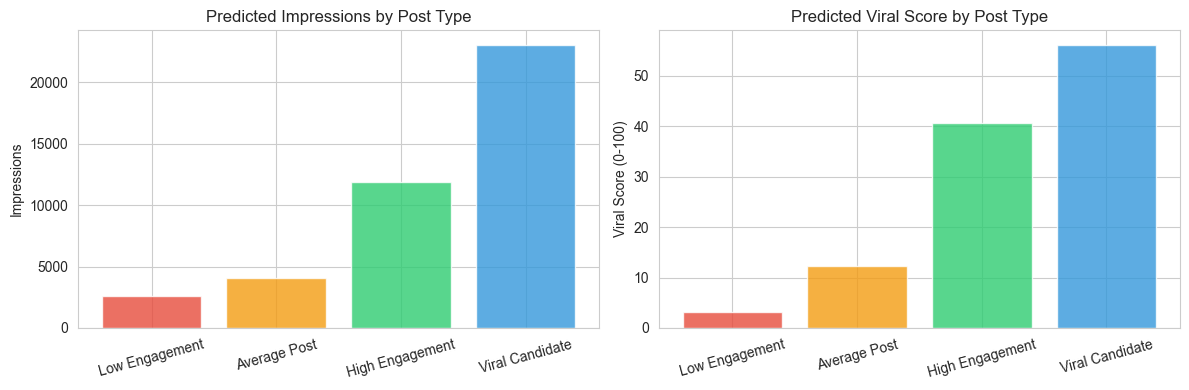

In [25]:
# Test different scenarios
test_scenarios = [
    ("Low Engagement", {'likes': 90, 'saves': 30, 'comments': 2, 'shares': 2, 
                        'profile_visits': 10, 'follows': 2}),
    ("Average Post", {'likes': 170, 'saves': 110, 'comments': 6, 'shares': 6,
                      'profile_visits': 25, 'follows': 8}),
    ("High Engagement", {'likes': 320, 'saves': 260, 'comments': 9, 'shares': 18,
                         'profile_visits': 200, 'follows': 70}),
    ("Viral Candidate", {'likes': 520, 'saves': 1000, 'comments': 18, 'shares': 70,
                         'profile_visits': 600, 'follows': 250})
]

comparison_results = []
for label, metrics in test_scenarios:
    pred_imp, pred_viral = predict_post_performance(**metrics)
    comparison_results.append({
        'Post Type': label,
        'Predicted Impressions': int(pred_imp),
        'Viral Score': round(pred_viral, 1)
    })
    print()

comparison_df = pd.DataFrame(comparison_results)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(comparison_df['Post Type'], comparison_df['Predicted Impressions'], 
            color=['#e74c3c', '#f39c12', '#2ecc71', '#3498db'], alpha=0.8)
axes[0].set_title('Predicted Impressions by Post Type')
axes[0].set_ylabel('Impressions')
axes[0].tick_params(axis='x', rotation=15)

axes[1].bar(comparison_df['Post Type'], comparison_df['Viral Score'],
            color=['#e74c3c', '#f39c12', '#2ecc71', '#3498db'], alpha=0.8)
axes[1].set_title('Predicted Viral Score by Post Type')
axes[1].set_ylabel('Viral Score (0-100)')
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

## 14. Key Findings and Insights

### Model Performance Summary

**For Impressions Prediction:**
- Best Model: Gradient Boosting (highest R² and lowest MAE)
- Runner-up: Ridge/Lasso Regression (best cross-validation scores)
- Why GB wins: Better at capturing non-linear relationships and outliers

**For Viral Score Prediction:**
- Best Model: Linear/Ridge Regression (near-perfect R²)
- Why Linear works: Viral score was created as a linear combination of features
- Simpler models work better when the relationship is truly linear

### Important Features

**For Impressions:**
1. Follows - New followers gained from the post
2. Profile Visits - How many checked your profile
3. Total Engagement - Combined interactions
4. Likes - Basic engagement metric

**For Viral Score:**
1. Likes - Most visible engagement signal
2. Saves - Strong quality indicator
3. Total Engagement - Overall interaction level
4. Follows - Conversion signal

### Practical Insights

**To Increase Reach:**
- Focus on content that drives profile visits and new follows
- The Instagram algorithm favors posts that convert viewers to followers
- Build engagement early (first hour matters)

**To Go Viral:**
- Prioritize saves and shares (quality over quantity)
- Create shareable, valuable content
- High engagement rate is more important than raw numbers

**General Tips:**
- Use 20-25 relevant hashtags for discovery
- Write informative captions (100-150 words)
- Post when your audience is most active
- Engage with comments to boost algorithmic visibility